## Comparision Between different architecture, LeNet, AlexNet, ResNet, VGGNet and GoogleNet

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [3]:
base_dir = "D:\\DeepLearning\\Soybean--main\\Soybean Leaf Dataset for Disease Classification"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'  
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  
)


Found 276 images belonging to 7 classes.
Found 69 images belonging to 7 classes.


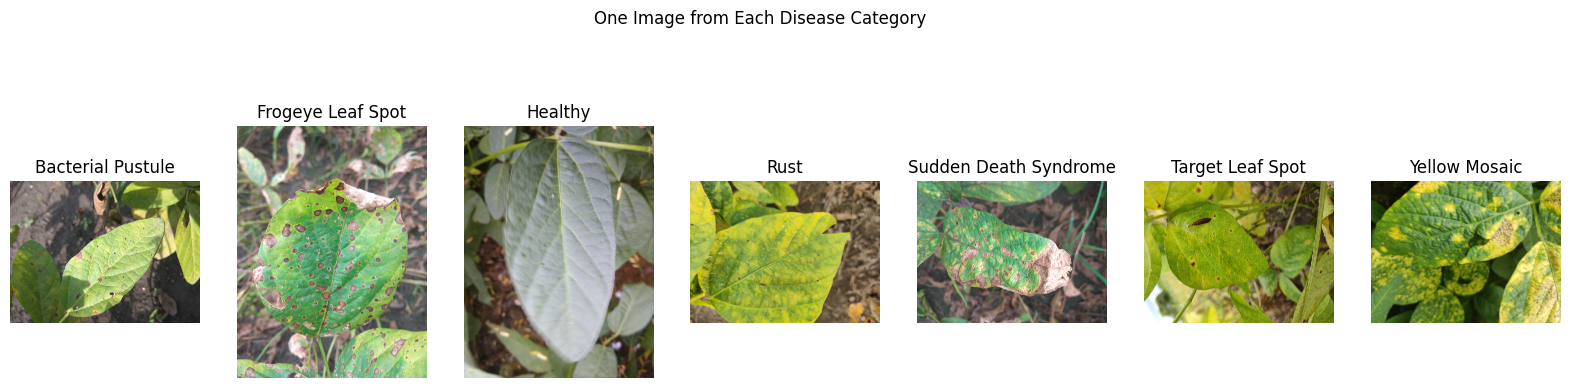

In [4]:

fig, axs = plt.subplots(1, 7, figsize=(20, 5)) 
fig.suptitle('One Image from Each Disease Category')

disease_categories = os.listdir(base_dir)

for i, category in enumerate(disease_categories):
    directory_path = os.path.join(base_dir, category)
    
    image_files = os.listdir(directory_path)
    image_path = os.path.join(directory_path, image_files[0])
    image = Image.open(image_path)

    axs[i].imshow(image)
    axs[i].axis('off')
    axs[i].set_title(category)

plt.show()


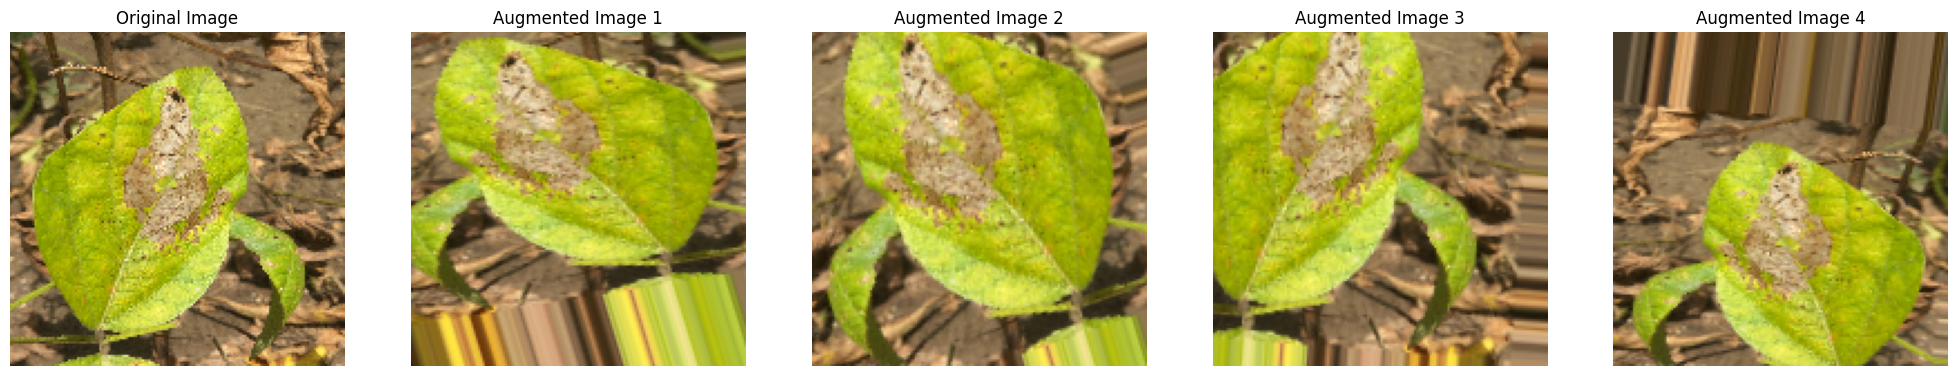

In [7]:

datagen = ImageDataGenerator(
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

image_path = r"D:\\DeepLearning\\Soybean--main\\Soybean Leaf Dataset for Disease Classification\Rust\Rust (39).jpg"  

image = load_img(image_path, target_size=(150, 150))  
x = img_to_array(image)
x = x.reshape((1,) + x.shape)  

fig, axes = plt.subplots(1, 5, figsize=(25, 5))  
axes[0].imshow(image)  
axes[0].axis('off')
axes[0].set_title('Original Image')

it = datagen.flow(x, batch_size=1)
for i in range(1, 5):
    batch = next(it)
    axes[i].imshow(batch[0].astype('uint8'))  
    axes[i].axis('off')
    axes[i].set_title(f'Augmented Image {i}')

plt.show()


In [8]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min',
    verbose=1)

### GoogleNet

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout, Input, Concatenate

def inception_module(x, filters):
    conv1 = Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    conv3 = Conv2D(filters[1], (3, 3), padding='same', activation='relu')(x)
    conv5 = Conv2D(filters[2], (5, 5), padding='same', activation='relu')(x)    
    pool = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_conv = Conv2D(filters[3], (1, 1), padding='same', activation='relu')(pool)
    out = Concatenate(axis=-1)([conv1, conv3, conv5, pool_conv])
    return out

def create_googlenet(input_shape):
    input_layer = Input(shape=input_shape)

    # Initial Convolution and max pooling
    x = Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu')(input_layer)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Inception modules
    x = inception_module(x, filters=[64, 128, 32, 32])
    x = inception_module(x, filters=[128, 192, 96, 64])
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = inception_module(x, filters=[192, 208, 48, 64])
    x = inception_module(x, filters=[160, 224, 64, 64])
    x = inception_module(x, filters=[128, 256, 64, 64])
    x = inception_module(x, filters=[112, 288, 64, 64])
    x = inception_module(x, filters=[256, 320, 128, 128])
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = inception_module(x, filters=[256, 320, 128, 128])
    x = inception_module(x, filters=[384, 384, 128, 128])

    # Final pooling and dense layers
    x = AveragePooling2D((7, 7), strides=(1, 1))(x)
    x = Flatten()(x)
    x = Dropout(0.4)(x)
    x = Dense(1000, activation='relu')(x)
    output_layer = Dense(7, activation='softmax')(x)

    model = Model(input_layer, output_layer)
    return model


In [ ]:
model = create_googlenet(input_shape=(150, 150, 3))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=early_stopping_callback  
)


### AlexNet

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

def create_alexnet(input_shape, num_classes):
    model = Sequential([
        Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=input_shape, padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        Conv2D(256, kernel_size=(5, 5), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'),
        Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'),
        Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        
        # Output Layer
        Dense(num_classes, activation='softmax')
    ])
    return model


In [ ]:
num_classes = 7
model = create_alexnet(input_shape=(150, 150, 3), num_classes=num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


### LeNet

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

def create_lenet(input_shape, num_classes):
    model = Sequential([
        Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=input_shape, padding='same'),
        AveragePooling2D(pool_size=(2, 2)),
        Conv2D(filters=16, kernel_size=(5, 5), activation='relu'),
        AveragePooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(120, activation='relu'),
        Dense(84, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    
    return model


In [ ]:
num_classes = 7
model = create_lenet(input_shape=(150, 150, 3), num_classes=num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


### ResNet

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam

def create_resnet50(num_classes, input_shape):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

    for layer in base_model.layers:
        layer.trainable = False
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model


In [ ]:
num_classes = 7  
model = create_resnet50(num_classes, input_shape=(150, 150, 3))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

### VGGNet

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

def create_vgg16(num_classes, input_shape):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    for layer in base_model.layers:
        layer.trainable = False
    
    x = Flatten()(base_model.output)
    x = Dense(4096, activation='relu')(x)
    x = Dense(4096, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)    
    return model


In [ ]:
num_classes = 7
model = create_vgg16(num_classes, input_shape=(150, 150, 3))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)



#### Accuracy using AlexNet = val_loss: 1.9509 - val_accuracy: 0.1449
#### Accuracy using ResNet = val_loss: 1.9442 - val_accuracy: 0.1449
#### Accuracy using GoogleNet = val_loss: 1.8735 - val_accuracy: 0.1449
#### Accuracy using LeNet = val_loss: 1.5651 - val_accuracy: 0.3913
#### Accuracy using VGGNet = val_loss: 1.0339 - val_accuracy: 0.5652